In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [91]:
iris = load_iris()
data = iris.data[50:]
target = (iris.target[50:] - 1).reshape(100,1)

In [4]:
data_norm = (data - data.mean())/data.std()

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(data, target)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
X = np.c_[np.ones(len(data_norm)), data]

In [56]:
theta = np.append(lr.intercept_,lr.coef_).reshape(5,1)
theta

array([[-1.21565523],
       [-1.70690955],
       [-1.53277945],
       [ 2.46921149],
       [ 2.5563083 ]])

In [87]:
cost(X, target)

array([0.21587763])

In [86]:
lr.score(data, target)

0.97

## Функции для расчета модели

http://cs231n.github.io/neural-networks-3/#sgd

In [136]:
theta = np.zeros((5,1))

In [6]:
def decision_func(X):
    return np.dot(X, theta)

In [7]:
def logistic_func(X):
    return 1 / (1 + np.exp(-decision_func(X)))

In [8]:
def cost(X, y):
    return -sum(y*np.log(logistic_func(X)) + (1-y)*(np.log(1-logistic_func(X)))) / len(y)

In [9]:
def grad(X, y):
    return np.dot(X.T, (logistic_func(X) - y)) / len(y)

In [10]:
def predict(X):
    return pd.DataFrame(X).apply(lambda x: 0 if logistic_func(x)<0.5 else 1, axis=1)

## Стохастический Градиентный спуск

Полученные коэффициенты:
[[-1.33854316 -2.27940998 -1.87464584  3.28847434  3.04815093]]

Для сравнения коэффициенты, полученные sklearn:
[-1.21565523 -1.70690955 -1.53277945  2.46921149  2.5563083 ]

Достигнутая оценка (cost):
[0.18171682]


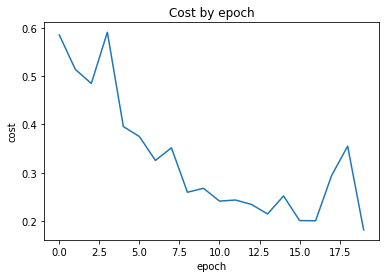

In [240]:
#Начальное значение
theta = np.zeros((5,1))
n_iter = 20
m = len(target)
a = 0.1

costs=[]
for _ in range(n_iter):
    for i in range(m):
        n = np.random.randint(m-1)
        a = 5 / (m + i)
        theta = theta - a * grad(X[n:n+1], target[n:n+1])
    costs.append(cost(X, target))

print('Полученные коэффициенты:')
print(theta.reshape(1, -1))
print('\nДля сравнения коэффициенты, полученные sklearn:')
print(np.append(lr.intercept_,lr.coef_))
print('\nДостигнутая оценка (cost):')
print(cost(X, target))

plt.plot(range(n_iter), costs)
plt.title('Cost by epoch')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [241]:
#Точность модели
len(np.where((predict(X)==iris.target[50:]-1)==True)[0])

96

## Momentum Optimization

Полученные коэффициенты:
[[-1.0068326  -1.96412461 -1.52726404  2.76443354  2.52607222]]

Для сравнения коэффициенты, полученные sklearn:
[-1.21565523 -1.70690955 -1.53277945  2.46921149  2.5563083 ]

Достигнутая оценка (cost):
[0.21240734]


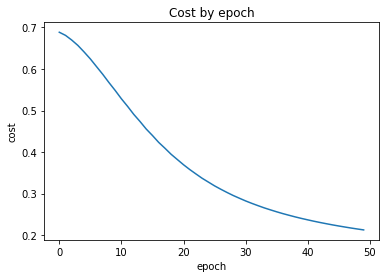

In [209]:
theta = np.zeros((5,1))
n_iter = 50
m = len(target)
mu=0.9
v=0
a=0.1

costs=[]
for _ in range(n_iter):
    v = mu * v - a * grad(X, target)
    theta = theta + v
    costs.append(cost(X, target))

print('Полученные коэффициенты:')
print(theta.reshape(1, -1))
print('\nДля сравнения коэффициенты, полученные sklearn:')
print(np.append(lr.intercept_,lr.coef_))
print('\nДостигнутая оценка (cost):')
print(cost(X, target))

plt.plot(range(n_iter), costs)
plt.title('Cost by epoch')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

## Nesterov momentum

Полученные коэффициенты:
[[-0.96430122 -1.95280016 -1.49265375  2.74326394  2.45160598]]

Для сравнения коэффициенты, полученные sklearn:
[-1.21565523 -1.70690955 -1.53277945  2.46921149  2.5563083 ]

Достигнутая оценка (cost):
[0.21587763]


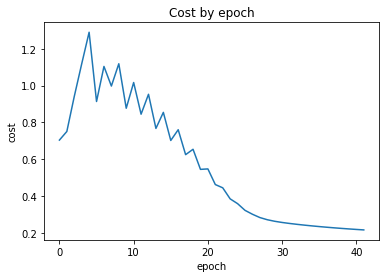

In [213]:
theta = np.zeros((5,1))
n_iter = 42
m = len(target)
mu=0.9
v=0
a=0.1

costs=[]
for _ in range(n_iter):
    v_prev = v
    v = mu * v - a * grad(X, target)
    theta += -mu * v_prev + (1 + mu) * v
    costs.append(cost(X, target))

print('Полученные коэффициенты:')
print(theta.reshape(1, -1))
print('\nДля сравнения коэффициенты, полученные sklearn:')
print(np.append(lr.intercept_,lr.coef_))
print('\nДостигнутая оценка (cost):')
print(cost(X, target))

plt.plot(range(n_iter), costs)
plt.title('Cost by epoch')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

## RMSProp

Полученные коэффициенты:
[[-2.63664348 -0.60943018 -0.97256253  0.98889082  2.4578052 ]]

Для сравнения коэффициенты, полученные sklearn:
[-1.21565523 -1.70690955 -1.53277945  2.46921149  2.5563083 ]

Достигнутая оценка (cost):
[0.30636633]


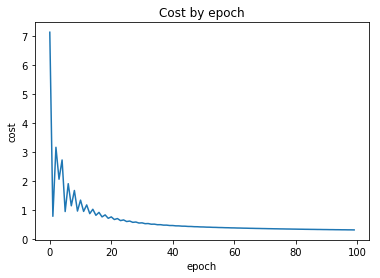

In [224]:
theta = np.zeros((5,1))
n_iter = 100
decay_rate = 0.99
cache = 0
a = 0.1
eps = 1e-8

costs=[]
for _ in range(n_iter):
    cache = decay_rate * cache + (1 - decay_rate) * grad(X, target)**2
    theta = theta - a * grad(X, target) / (np.sqrt(cache) + eps)
    costs.append(cost(X, target))

print('Полученные коэффициенты:')
print(theta.reshape(1, -1))
print('\nДля сравнения коэффициенты, полученные sklearn:')
print(np.append(lr.intercept_,lr.coef_))
print('\nДостигнутая оценка (cost):')
print(cost(X, target))

plt.plot(range(n_iter), costs)
plt.title('Cost by epoch')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()